# Projeto 4 - Recomendação de vinhos - Wine Reviews

# Enunciado

## Wine Reviews - Kaggle


O conjunto de dados Wine Reviews possui o comentário e a nota dada por cada especialista sobre diversos vinhos. O autor se inspirou para fazer este conjunto de dados após assistir Somm, um documentário sobre mestres sommeliers de vinho.

## Preparação do ambiente


* Para este projeto, acessem o link do Kaggle e, logo abaixo, cliquem em "Download". Caso você não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.
* Crie o projeto no Github
* Use o cookiecutter para organizar o projeto
* Leia todo o material disponibilizado no Kaggle para entender esses dados
* Caso precise, leia outros projetos que usaram este mesmo conjunto de dados

## Projeto

<ol>
    <li>Use os passos do Crisp-DM para desenvolver o projeto.</li>
    <li>Observe os dados e busque levantar observações importantes, tais como:</li>
    <ol>
        <li>Qual vinho é o mais caro? E o mais barato?</li>
        <li>Qual especialista avaliou mais vinhos? Qual a sua nota média?</li>
        <li>Qual região possui os vinhos com as maiores avaliações? E qual possui os vinhos mais baratos?<?li>
    </ol>
    <li>Faça o sistema de recomendação</li>
    <li>Escreva o relatório</li>
    <li>Disponibilize o repositório do seu projeto</li>
</ol>

## Exercícios

Separe o notebook entre analise exploratória, construção do sistema de recomendação e relatório.
1. (3 pontos) **Análise exploratória**: realize as análises deste conjunto de dados, crie gráficos e anote as suas idéias.
2. (3 pontos) **Sistema de recomendação**: faça a construção de seu sistema de recomendação
4. (4 pontos) **Relatório**: construa um relatório utilizando o Markdown para escrever. Seja criativo para apresentar seus achados e siga os passos abaixo:
    * Imagine que você possui uma startup e este é o primeiro relatório apresentará
    * Coloque o nome do seu produto
    * Apresente a introdução do problema (seja sucinto, escreva com poucas palavras)
    * Coloque gráficos e frases para sustentar seus argumentos
    * Mostre as soluções do mercado
    * Escreva sobre a sua solução e por que ela é a melhor

# 1. (3 pontos) **Análise exploratória**: realize as análises deste conjunto de dados, crie gráficos e anote as suas idéias.


## Análise Exploratória

### Carregando dados

In [1]:
import pandas as pd

wines = pd.read_csv('../data/raw/winemag-data-130k-v2.csv')
wines.head()

c:\Users\duart\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\duart\miniconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\duart\miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

### Verificação de valores nulos

In [2]:
wines.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [3]:
# Percentuais de falha
100 * wines.isna().sum() / len(wines)

Unnamed: 0                0.000000
country                   0.048472
description               0.000000
designation              28.825661
points                    0.000000
price                     6.921544
province                  0.048472
region_1                 16.347493
region_2                 61.136715
taster_name              20.192197
taster_twitter_handle    24.015357
title                     0.000000
variety                   0.000769
winery                    0.000000
dtype: float64

### Tratamento de falhas

* Como `region_2` têm mais de 60% de falhas será removida da análise
* `Unnamed: 0` será removida por por não conter informação útil
* `region_1` também possui um número de falhas considerável e não parece ser relevante para o trabalho, portanto será removida.
* Pelos mesmos motivos das outras colunas `designation` também será removida. 

Remoção de variáveis:

In [4]:
wines = wines.drop(['region_2', 'Unnamed: 0', 'region_1', 'designation'], axis=1)
wines.head()

country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87    NaN   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

            province         taster_name taster_twitter_handle  \
0  Sicily & Sardinia       Kerin O’Keefe          @kerinokeefe   
1              Douro          Roger Voss            @vossroger   
2             Oregon        Paul Gregutt           @paulgwine    
3           Michigan  Alexander Peartree                   NaN   
4             Oregon        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

Falhas percentuais

In [5]:
# Percentuais de falha
100 * wines.isna().sum() / len(wines)

country                   0.048472
description               0.000000
points                    0.000000
price                     6.921544
province                  0.048472
taster_name              20.192197
taster_twitter_handle    24.015357
title                     0.000000
variety                   0.000769
winery                    0.000000
dtype: float64

In [6]:
# Falhas em country serão removidas e automaticamente a província pois são coincidentes
# Não posso preencher designation pela grande quantidade de valores únicos e a pouca diferença entre o mais comum e os próximos
wines.dropna(subset=['country'], inplace=True)

# Price será preenchido com a média
wines.price.fillna(wines.price.mean(), inplace=True)

# A coluna variety será preenchida com a moda
moda = wines.variety.mode().values[0]
wines.variety.fillna(moda, inplace=True)

In [7]:
wines.isna().sum()

country                      0
description                  0
points                       0
price                        0
province                     0
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      0
winery                       0
dtype: int64

As colunas `taster_name` e `taster_twitter_handle` também têm uma quantidade considerável de falhas. Não considero que sejam relevantes para um sistema de recomendação. Por estes motivos elas serão removidos na etapa de modelagem.

### Verificação de dados repetidos

In [8]:
print('Quantidade total de registros', len(wines))
print('Quantidade de registros duplicados', wines.duplicated().sum())

Quantidade total de registros 129908
Quantidade de registros duplicados 9979


In [9]:
duplicates = wines.loc[wines.duplicated()]
wines.query(f'description == "{duplicates.description.values[1]}"')

country                                        description  points  \
57     Italy  There's a touch of toasted almond at the start...      85   
2409   Italy  There's a touch of toasted almond at the start...      85   

      price           province taster_name taster_twitter_handle  \
57     13.0  Sicily & Sardinia         NaN                   NaN   
2409   13.0  Sicily & Sardinia         NaN                   NaN   

                                                  title variety  \
57    Tasca d'Almerita 2011 Sallier de la Tour Grill...  Grillo   
2409  Tasca d'Almerita 2011 Sallier de la Tour Grill...  Grillo   

                winery  
57    Tasca d'Almerita  
2409  Tasca d'Almerita

Vê-se que há registros duplicados que não agregam informação útil. Então serão removidos a seguir.

#### Remoção dos valores duplicados

In [10]:
wines = wines.drop_duplicates()
wines.shape

(119929, 10)

### Insights

#### Qual vinho é o mais caro? 

In [11]:
wines.sort_values('price', ascending=False).head(1)

country                                        description  points  \
80290  France  This ripe wine shows plenty of blackberry frui...      88   

        price  province taster_name taster_twitter_handle  \
80290  3300.0  Bordeaux  Roger Voss            @vossroger   

                                      title                   variety  \
80290  Château les Ormes Sorbet 2013  Médoc  Bordeaux-style Red Blend   

                         winery  
80290  Château les Ormes Sorbet

O vinho mais caro do dataset é o Château les Ormes Sorbet 2013 Médoc produzido na província de Bordeaux na França com preço de 3300 dólares.

#### E o mais barato?

In [12]:
wines.sort_values('price').head(1)

country                                        description  points  \
64590      US  There's a lot going on in this Merlot, which i...      86   

       price    province taster_name taster_twitter_handle  \
64590    4.0  California         NaN                   NaN   

                               title variety  winery  
64590  Bandit NV Merlot (California)  Merlot  Bandit

O vinho mais barato do dataset é o Bandit NV Chardonnay (California) produzido na Califórnia nos Estados Unidos com preço sugerido de 4 dólares.

#### Qual especialista avaliou mais vinhos? Qual a sua nota média?

In [13]:
taster = wines.taster_name.mode().values[0]
n_evaluations = len(wines.query(f'taster_name == "{taster}"'))
avg_points = round(wines.query(f'taster_name == "{taster}"').points.mean(), 2)

print(f'{taster} foi o especialista com mais avaliações. Ele avaliou um total de {n_evaluations} vinhos dando uma nota média de {avg_points}.')

Roger Voss foi o especialista com mais avaliações. Ele avaliou um total de 23558 vinhos dando uma nota média de 88.73.


#### Qual região possui os vinhos com as maiores avaliações?

In [14]:
avg_points_region = wines.groupby('province').points.mean()
region = avg_points_region.sort_values(ascending=False).head(1)
print('Região e nota:', region)
country = wines.query(f"province == '{region.index[0]}'").country.values[0]
print('País:', country)

Região e nota: province
Südburgenland    94.0
Name: points, dtype: float64
País: Austria


A província com as maiores notas foi Südburgenland. Descrita a seguir.

In [15]:
wines.query('province == "Südburgenland"')

country                                        description  points  \
85527   Austria  Tar and smoke add a note of intrigue to dark, ...      93   
109435  Austria  Elderberry with edges of tar and smoke, a flor...      95   

        price       province       taster_name taster_twitter_handle  \
85527    35.0  Südburgenland  Anne Krebiehl MW           @AnneInVino   
109435   79.0  Südburgenland  Anne Krebiehl MW           @AnneInVino   

                                                    title        variety  \
85527           Jalits 2012 Steinberg Red (Südburgenland)      Red Blend   
109435  Krutzler 2012 Perwolff Blaufränkisch (Südburge...  Blaufränkisch   

          winery  
85527     Jalits  
109435  Krutzler

#### E qual possui os vinhos mais baratos?

In [16]:
avg_points_region = wines.groupby('province').price.mean()
avg_points_region.sort_values().head(1)

province
Viile Timisului    7.5
Name: price, dtype: float64

In [17]:
wines.query('province == "Viile Timisului"').head(1)

country                                        description  points  \
8423  Romania  Tart cherry, tobacco and leather present thems...      85   

      price         province   taster_name taster_twitter_handle  \
8423    7.0  Viile Timisului  Jeff Jenssen        @worldwineguys   

                                                  title             variety  \
8423  Cramele Recas 2014 Dreamfish Cabernet Sauvigno...  Cabernet Sauvignon   

             winery  
8423  Cramele Recas

A província de Viile Timisului, na Romênia, têm os vinhos com a média de preços mais baixa.

#### Quais os vinhos mais bem avaliado?

In [18]:
wines.groupby('title').points.mean().sort_values(ascending=False).head(5)

title
Quinta do Noval 2011 Nacional Vintage  (Port)                 100.0
Charles Smith 2006 Royal City Syrah (Columbia Valley (WA))    100.0
Casa Ferreirinha 2008 Barca-Velha Red (Douro)                 100.0
Casanova di Neri 2007 Cerretalto  (Brunello di Montalcino)    100.0
Cardinale 2006 Cabernet Sauvignon (Napa Valley)               100.0
Name: points, dtype: float64

Quantas avaliações ele teve?

In [19]:
wines.query('title == "Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne)"')

country                                        description  points  \
89729  France  This new release from a great vintage for Char...     100   

       price   province taster_name taster_twitter_handle  \
89729  617.0  Champagne  Roger Voss            @vossroger   

                                                   title     variety winery  
89729  Salon 2006 Le Mesnil Blanc de Blancs Brut Char...  Chardonnay  Salon

Apenas uma avaliação. Qual a mediana do número de avaliações dos vinhos?

In [20]:
wines.groupby('title').taster_name.count().median()

1.0

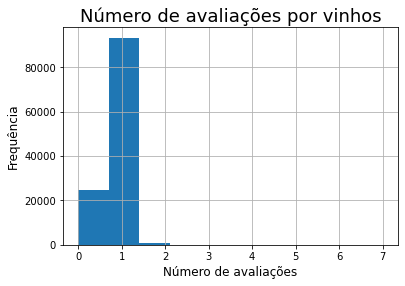

In [24]:
import matplotlib.pyplot as plt

wines.groupby('title').taster_name.count().hist()
plt.xlabel('Número de avaliações', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Número de avaliações por vinhos', fontsize=18)
plt.savefig('../data/output_images/hist_wine_evaluations.png',
            dpi=150, facecolor='white')
plt.show()

Como temos que a maioria dos vinhos é avaliada por apenas 1 avaliador. Avaliar os vinhos individualmente pela nota não parece ser uma boa métrica.

#### Quais os vinhos com as piores avaliações?

In [ ]:
wines.groupby('title').points.mean().sort_values(ascending=True).head(5)

title
Cooper Vineyards NV Noche Sweet Table Wine Red (Virginia)    80.0
Finca Pasión 2009 Mi Fuego Syrah (Mendoza)                   80.0
Maddalena 2010 Pinot Grigio (Monterey)                       80.0
Corinto 2009 Selection Syrah (Central Valley)                80.0
Campus Oaks 2012 Chardonnay (Lodi)                           80.0
Name: points, dtype: float64

### Qual a distribuição dos dados espacialmente. Qual o países mais aparecem nos registros?

In [ ]:
top_10_countries = wines.country.value_counts()[:10].to_frame().reset_index()
top_10_countries

index  country
0         US    50457
1     France    20353
2      Italy    17940
3      Spain     6116
4   Portugal     5256
5      Chile     4184
6  Argentina     3544
7    Austria     3034
8  Australia     2197
9    Germany     1992

In [ ]:
country_names = {'US': 'Estados Unidos', 'France': 'França', 'Italy': 'Itália',
                'Spain': 'Espanha', 'Portugal': 'Portugal', 'Chile': 'Chile',
                'Argentina': 'Argentina', 'Austria': 'Áustria', 'Australia': 'Austrália',
                'Germany': 'Alemanha'}

top_10_countries['index'] = top_10_countries['index'].map(country_names)

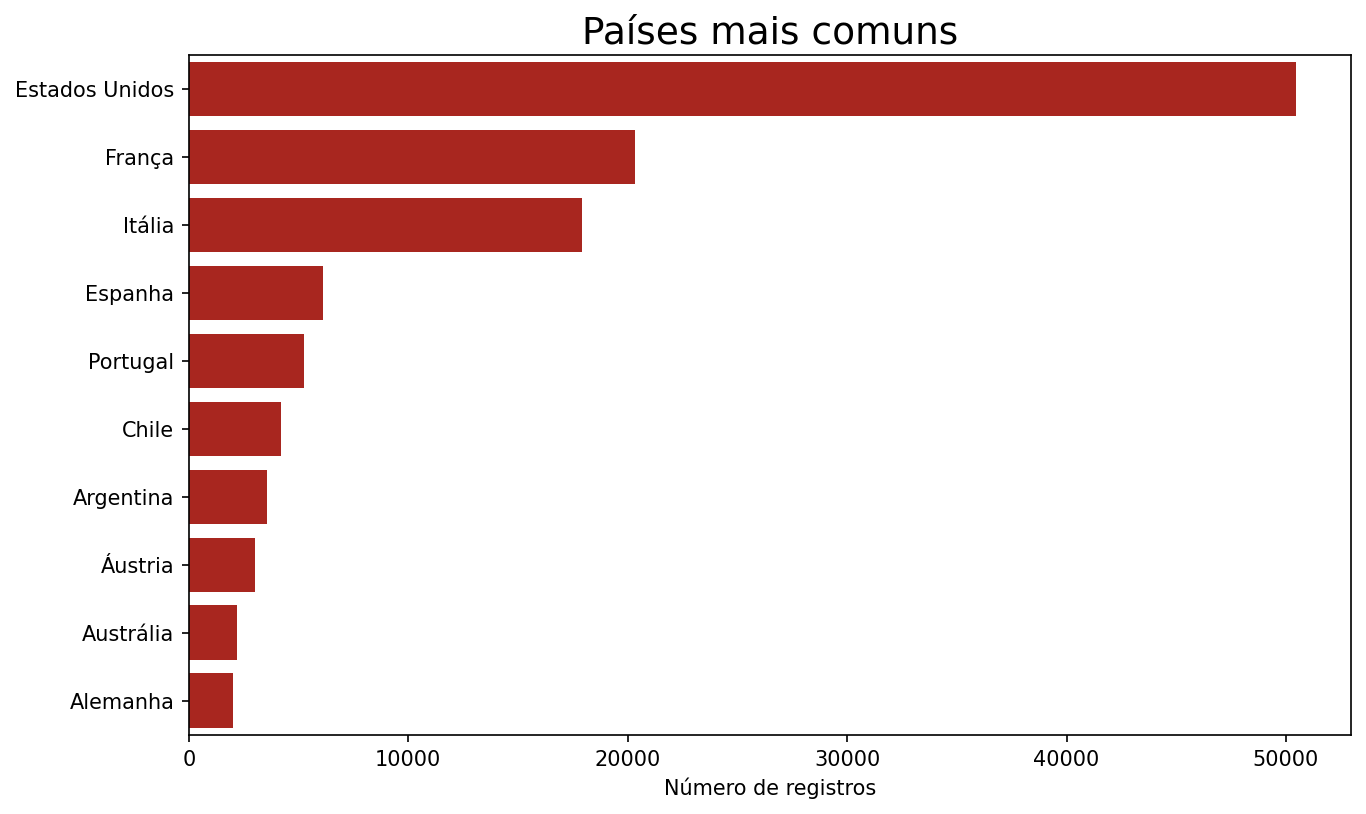

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=150)
sns.barplot(data=top_10_countries, y='index', x='country', color='#bf1108')
plt.title('Países mais comuns', fontsize=18)
plt.ylabel('')
plt.xlabel('Número de registros')
plt.savefig('../data/output_images/top_10_coutries_by_production.jpeg', dpi=150)

Estados Unidos, França e Itália são os 3 principais produtores de vinhos deste dataset.

### Qual a distribuição de preços segundo o estilo do vinho? Qual o mais comum? E o menos comum?

Este site (https://winefolly.com/tips/the-9-major-wine-styles/) lista os 9 principais estilos de vinho. Eles serão utilizado para classificar os vinhos do dataset segundo seu estilo. Algumas vaieades de vinhos foram classificada a partir do site referido anteriormente e outras foram classificadas após extensa pesquisa na internet algumas fontes consultadas foram: vivino, wine.com, wineparadigm.com, virginwines, winefolly, winebody, vinello...

In [ ]:
import numpy as np
styles = {'Full-Bodied Red Wines':       ['Syrah', 'Cabernet Sauvignon', 'Monastrell', 'Malbec', 'Montepulciano', 'Aglianico', 'Dolcetto', 'Petite Sirah', 'Nebbiolo',
                                           'Tempranillo', "Nero d’Avola", 'Sagrantino', 'Tannat', 'Meritage', 'Red Blend', "Nero d'Avola", 'Primitivo',
                                           'Bordeaux-style Red Blend', 'Touriga Nacional', "Rhône-style Red Blend", 'Graciano', 'G-S-M', 'Shiraz', 'Garnacha Tintorera',
                                           'Pinotage', 'Tinta Miúda', 'Corvina, Rondinella, Molinara', 'Duras', 'Mourvèdre', 'Austrian Red Blend', 'Claret', 'Baga',
                                           'Aragonês', 'Agiorgitiko', 'Tinta de Toro', 'Cabernet Moravia', 'Lagrein', 'Tinta Fina'],
           'Medium-Bodied Red Wines':     ['Sangiovese', 'Zinfandel', 'Grenache', 'Merlot', 'Negroamaro', 'Barbera', 'Cabernet Franc', 'Valpolicella Wines', 'GSM blends',
                                           'Monica', 'Carmenère', 'Blaufränkisch', 'Mencía', 'Pinot Nero', 'Früburgunder', 'Papaskarasi', 'Charbono', 'Provence red blend',
                                           'Garnacha', 'Pinot Meunier', 'Nero di Troia', 'Cesanese', 'Feteasca Neagra', 'Pugnitello'],
           'Light-Bodied Red Wines':      ['Pinot Noir', 'Cinsault', 'Gamay', 'Ciliegiolo', 'Freisa', 'Schiava', 'Brachetto', 'Frappato', 'Nerello Mascalese', 
                                           'Petit Verdot', 'Prugnolo Gentile', 'Bonarda', 'Zierfandler', 'Zweigelt', 'Sousão', 'Teroldego', 'Refosco', 'Ruché',
                                           'Chambourcin', 'St. Laurent', 'Tinta Roriz'
                                           ],
           'Rosé Wines':                  ['Garnacha Rosé', 'Côtes du Rhône Rosé', 'Provence Rosé', 'Sangiovese Rosé', 'Mourvèdre Rosé', 'Pinot Noir Rosé', 'Rosé',
                                           'Rosato', 'Melon', 'Rosado'],
           'Full-Bodied White Wines':     ['Oaked Chardonnay', 'Sémillon', 'Viognier', 'Marsanne', 'White Blend', 'Inzolia', 'Grillo', 'Petit Manseng', 'Vernaccia',
                                           'Pinot Bianco', 'Vignoles', 'Cortese', 'Rhône-style White Blend', 'Vidal', 'Cannonau', 'Scheurebe', 'Kerner', 'Glera',
                                           'Roter Veltliner', 'Antão Vaz', 'Silvaner', 'Sylvaner', 'Fiano', 'Roussanne', 'Avesso', 'Greco', 'Insolia', 'Roditis',
                                           'Traminer', 'Zibibbo', 'Muskat Ottonel', 'Bical', 'Tocai'],
           'Light-Bodied White Wines':    ['Albariño', 'Unoaked Chardonnay', 'Garganega', 'Grüner Veltliner', 'Pinot Gris', 'Pinot Grigio', 'Sauvignon Blanc',
                                           'Verdicchio', 'Verdejo', 'Vermentino', 'Chardonnay', 'Catarratto', 'Bordeaux-style White Blend', 'Pinot Blanc',
                                           'Alsace white blend', 'Fumé Blanc', 'Furmint', 'Moscato', 'Ugni Blanc-Colombard', 'Friulano', 'Assyrtico', 'Savagnin',
                                           'Muscat', 'Muscadelle', 'Verdelho', 'Vilana', 'Viura', 'Verduzzo', 'Colombard', 'Carricante', 'Xarel-lo', 'Trebbiano',
                                           'Ribolla Gialla', 'Weissburgunder', 'Prié Blanc', 'Falanghina', 'Müller-Thurgau', 'Pansa Blanca', 'Moscatel', 'Alvarinho',
                                           'Manzoni', 'Assyrtiko', 'Traminette'],
           'Aromatic White Wines':        ['Chenin Blanc', 'Gewürztraminer', 'Muscat Blanc', 'Riesling', 'Torrontés', 'Malvasia Bianca', 'Turbiana', 'Cerceal'],
           'Dessert & Fortified Wines':   ['Port', 'Sherry', 'Madeira', 'Late Harvest', 'Noble Rot', 'Gelber Muskateller', 'Malagousia', 'Rieslaner'],
           'Champagne & Sparkling Wines': ['Champagne', 'Cava', 'Prosecco', 'Metodo Classico', 'Sparkling', 'Sekt', 'Lambrusco']}

wines['style'] = np.nan

for style in styles:
    for wine in styles[style]:
        wines.loc[wines.variety.str.lower().str.contains(wine.lower()), 'style'] = style

##### Qual o estilo de vinho mais comum? E o menos comum?

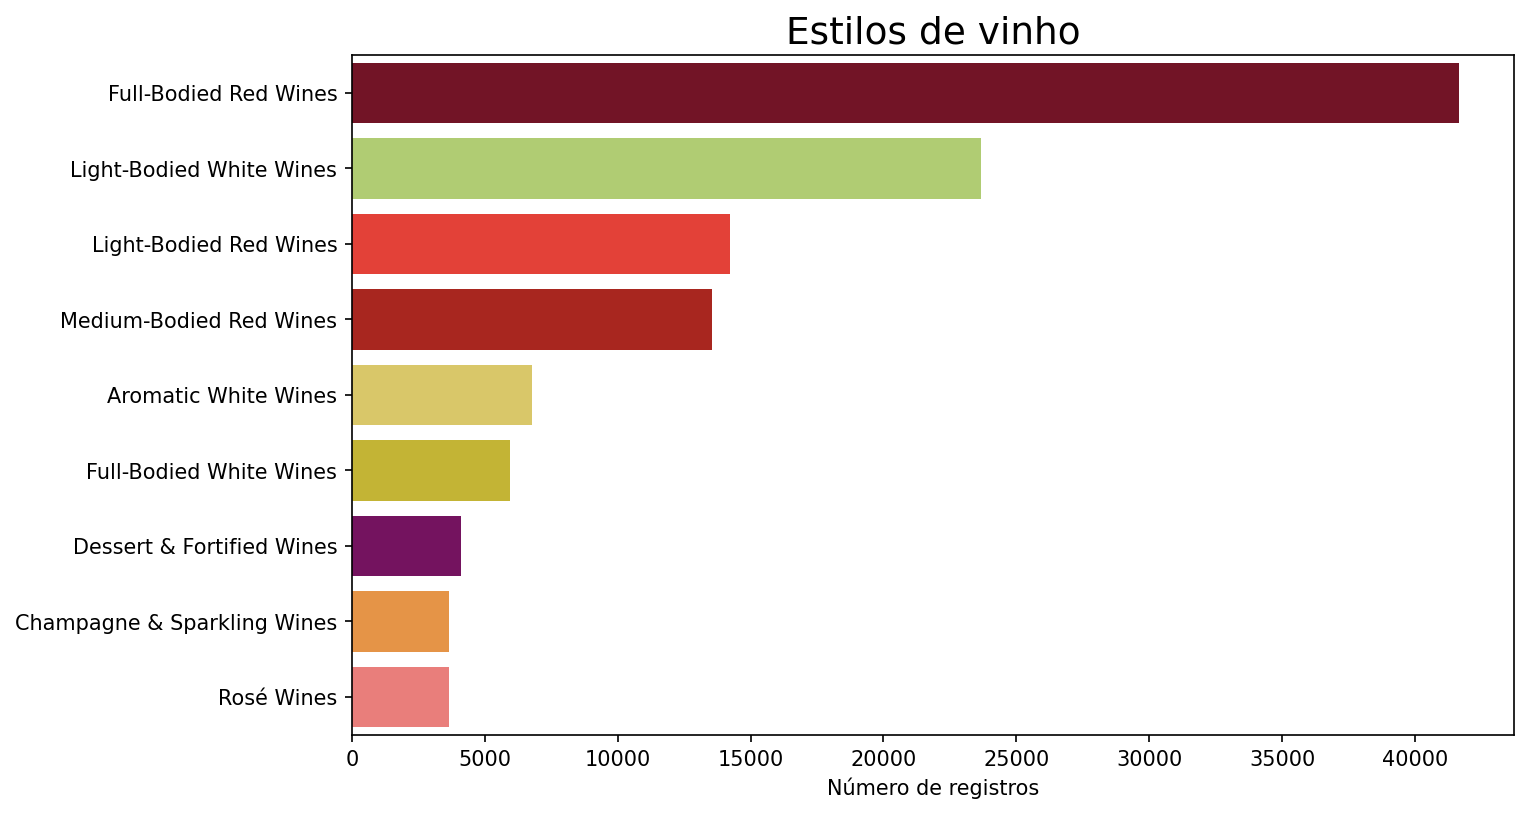

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = {'Full-Bodied Red Wines':       '#82041c',
          'Medium-Bodied Red Wines':     '#bf1108',
          'Light-Bodied Red Wines':      '#ff271c',
          'Rosé Wines':                  '#fb6d69',
          'Full-Bodied White Wines':     '#dbc61d', 
          'Light-Bodied White Wines':    '#b5db64',
          'Aromatic White Wines':        '#ecd456',
          'Dessert & Fortified Wines':   '#840368',
          'Champagne & Sparkling Wines': '#ff932d',
          }

plt.figure(figsize=(10, 6), dpi=150)
sns.countplot(data=wines, y='style', order=wines['style'].value_counts().index, palette=colors)
plt.title('Estilos de vinho', fontsize=18)
plt.ylabel('')
plt.xlabel('Número de registros')
plt.savefig('../data/output_images/most_common_wine_styles.png',
            dpi=150, facecolor='white')

#### Qual a distribuição do preço dos vinhos?

<Figure size 1500x900 with 0 Axes>

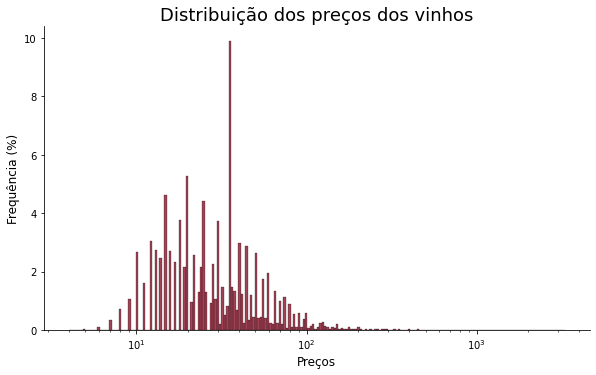

In [ ]:
plt.figure(figsize=(10, 6), dpi=150)
sns.displot(data=wines, x='price', log_scale=True, stat='percent', color=colors['Full-Bodied Red Wines'], aspect=1.67)
plt.xlabel('Preços', fontsize=12)
plt.ylabel('Frequência (%)', fontsize=12)
plt.title('Distribuição dos preços dos vinhos', fontsize=18)
plt.savefig('../data/output_images/hist_wine_prices.png', 
            dpi=150, facecolor='white')

#### Qual a distribuição geral das notas?

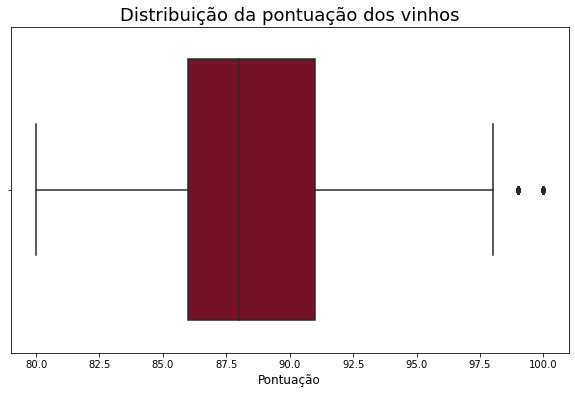

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=wines, x='points', color=colors['Full-Bodied Red Wines'])
plt.xlabel('Pontuação', fontsize=12)
plt.title('Distribuição da pontuação dos vinhos', fontsize=18)
plt.savefig('../data/output_images/boxplot_wine_points.png',
            dpi=150, facecolor='white')

<Figure size 1500x900 with 0 Axes>

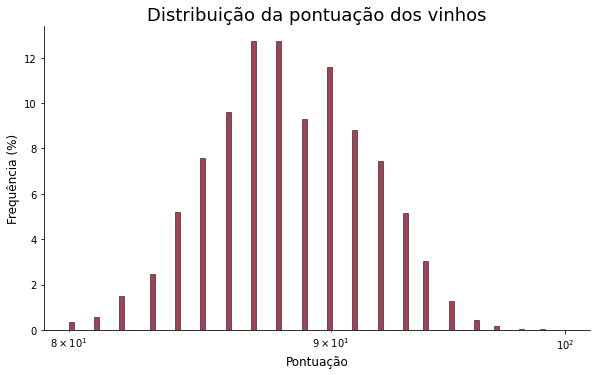

In [ ]:
plt.figure(figsize=(10, 6), dpi=150)
sns.displot(data=wines, x='points', log_scale=True, stat='percent', color=colors['Full-Bodied Red Wines'], aspect=1.67)
plt.xlabel('Pontuação', fontsize=12)
plt.ylabel('Frequência (%)', fontsize=12)
plt.title('Distribuição da pontuação dos vinhos', fontsize=18)
plt.savefig('../data/output_images/hist_wine_points.png',
            dpi=150, facecolor='white')

####  Distribuição das notas por estilo?

In [ ]:
import plotly.express as px

fig = px.box(wines.dropna(), y='style', x="points", color='style', color_discrete_map=colors,
             title='Distribuição das notas por estilo', height=800, labels= {'style': '', 'points':'Pontos'})
fig.show()
fig.write_image('../data/output_images/boxplot_wine_points_by_style.png')

### Quais os adjetivos mais comuns nas descrições?

Agora o nome dos `tasters` não será mais necessário por isto serão removidos.

In [ ]:
wines.drop(['taster_name', 'taster_twitter_handle'], axis=1, inplace=True)
wines.shape

(119929, 9)

Alguns vinhos ficaram sem stilo definido e serão removidos.

In [ ]:
wines.dropna(inplace=True)
wines.shape

(117236, 9)

Preservando uma cópia dos dados originais.

In [ ]:
wines_original = wines.copy()

Preparação dos dados para o sistema de recomendação.

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer()

descriptions = []

for row, description in enumerate(wines.description.values[:]):
    description = tokenizer.tokenize(description)
    description = [stemmer.stem(w.lower()) for w in description if not w.lower() in stop_words]
    descriptions.append(' '.join(description))

wines['description'] = descriptions
wines.head()

country                                        description  points  \
0     Italy  aroma includ tropic fruit broom brimston dri h...      87   
1  Portugal  ripe fruiti wine smooth still structur firm ta...      87   
2        US  tart snappi flavor lime flesh rind domin green...      87   
3        US  pineappl rind lemon pith orang blossom start a...      87   
4        US  much like regular bottl 2012 come across rathe...      87   

       price           province  \
0  35.368644  Sicily & Sardinia   
1  15.000000              Douro   
2  14.000000             Oregon   
3  13.000000           Michigan   
4  65.000000             Oregon   

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery                      style  
0              Nicosia    Full-Bodied White Wines  
1  Quinta dos Avidagos  Dessert & Fortified Wines  
2            Rainstorm   Light-Bodied White Wines  
3           St. Julian       Aromatic White Wines  
4         Sweet Cheeks     Light-Bodied Red Wines

Contagem das palavras mais frequentes

In [ ]:
import nltk

all_descriptions = ' '.join(wines.description.values[:])
all_words = nltk.tokenize.word_tokenize(all_descriptions)
all_word_dist = nltk.FreqDist(w.lower() for w in all_words)
most_common= all_word_dist.most_common(15)
most_common

[('wine', 74941),
 ('flavor', 64180),
 ('fruit', 57658),
 ('aroma', 36344),
 ('finish', 36194),
 ('acid', 35659),
 ('palat', 34185),
 ('drink', 30552),
 ('cherri', 30408),
 ('tannin', 29843),
 ('ripe', 26268),
 ('black', 26170),
 ('dri', 23985),
 ('note', 22550),
 ('spice', 21295)]

In [ ]:
words_join = ", ".join(all_words)

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(['drink', 'fruit', 'wine', 'flavor'])

wordcloud = WordCloud(background_color="white", max_words=100,
                      width=1600, height=800).generate(words_join)

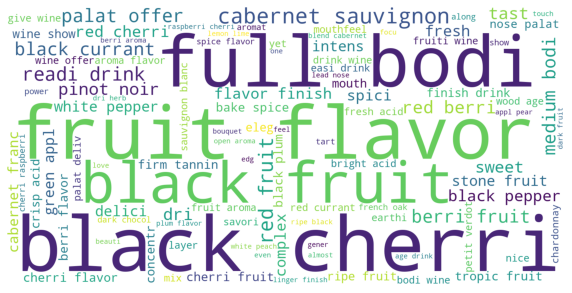

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

In [ ]:
wordcloud.to_file("../data/output_images/wines_description_wordcloud.png")

### Exportação de dados que serão utilizados no sistema de recomendação

Exportando dados de consulta do usuário

In [ ]:
wines_original.to_csv('../data/processed/wines_user_consult.csv', index=False)

Exportanto dados de alimentação do sistema de recomendação.

O sistema de recomendação irá considerar apenas a descrição do vinho e o seu título.

In [ ]:
wines[['title', 'description']].to_csv('../data/processed/wines_recomendation_system.csv', index=False)